# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Очень хорошее введение в проект. Оно будет полезным, когда соберешь большое портфолио и в какой-то момент решишь освежить проект в памяти.

</div>


### 1. Откроем файл с данными и изучим общую информацию

In [1]:
# импорт библиотеки pandas и plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# прочитаем файл real_estate_data.csv и сохраним его в переменной data.
# для разделения "склеенных" столбцов используем разделитель '\t'
data = pd.read_csv('datasets/real_estate_data (1).csv', sep='\t') 

In [3]:
# получение первых 10 строк таблицы data
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

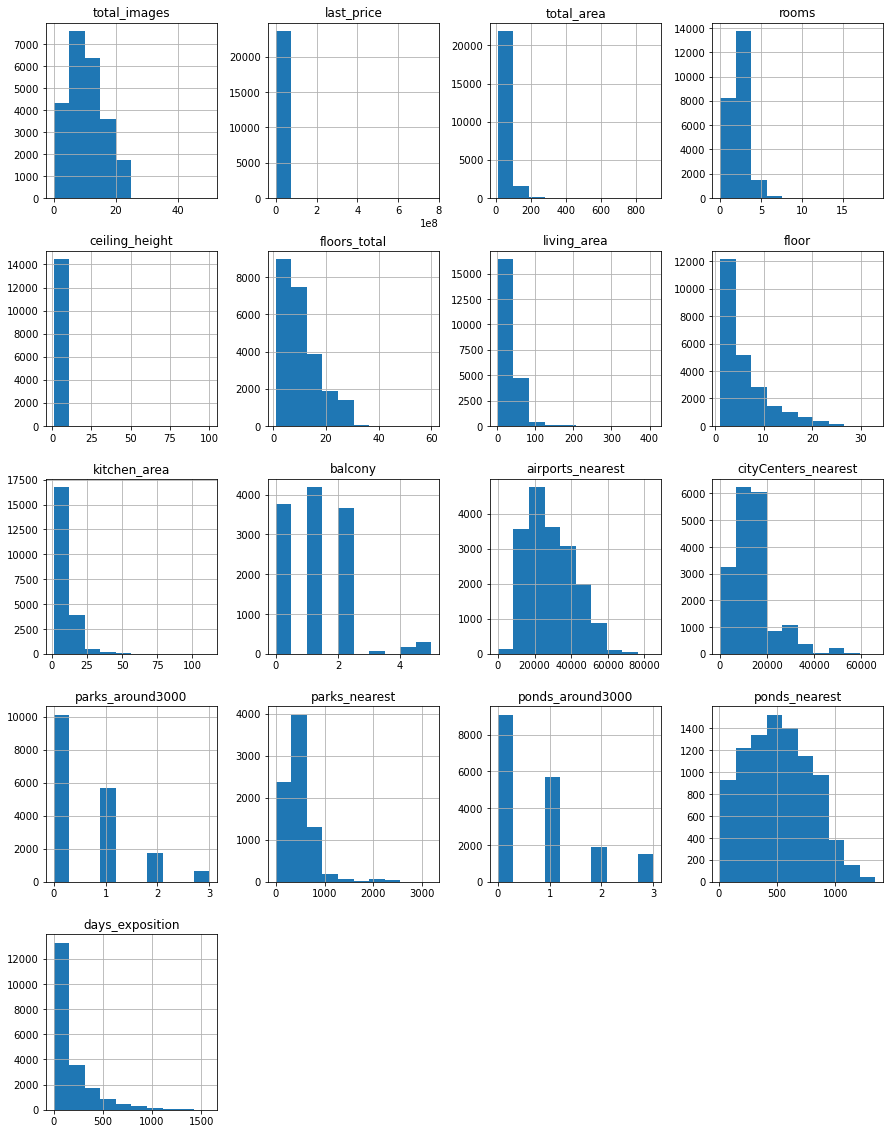

In [5]:
# построим гистограмму по каждому столбцу таблицы data размером 15*20
data.hist(figsize=(15, 20));

**Рассмотрим полученную информацию подробнее.**

Всего в таблице 22 столбца, тип данных столбцов - bool(2), float64(14), int64(3), object(3).

Подробно разберём, какие в data столбцы, какую информацию они содержат и к какому типу данных относятся:

 - total_images - число фотографий квартиры в объявлении - int64;  
 - last_price - цена на момент снятия с публикации - float64;
 - total_area - общая площадь квартиры в квадратных метрах (м²) - float64;
 - first_day_exposition - дата публикации - object;
 - rooms - число комнат - int64;
 - ceiling_height - высота потолков (м) - float64;
 - floors_total - всего этажей в доме - float64;
 - living_area -  жилая площадь в квадратных метрах (м²) - float64;
 - floor - этаж - int64;  
 - is_apartment - апартаменты - (булев тип) object; 
 - studio - квартира-студия - bool;   
 - open_plan - свободная планировка - bool;  
 - kitchen_area - площадь кухни в квадратных метрах (м²) - float64;
 - balcony - число балконов - float64;
 - locality_name - название населённого пункта - object; 
 - airports_nearest - расстояние до ближайшего аэропорта в метрах (м) - float64;
 - cityCenters_nearest - расстояние до центра города (м) - float64;
 - parks_around3000 - число парков в радиусе 3 км - float64;
 - parks_nearest - расстояние до ближайшего парка (м) - float64;
 - ponds_around3000 - число водоёмов в радиусе 3 км - float64;
 - ponds_nearest - расстояние до ближайшего водоёма (м) - float64;
 - days_exposition - сколько дней было размещено объявление (от публикации до снятия) - float64.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

**Выводы:**

Каждая строка таблицы содержит информацию о недвижимости с определенными параметрами данных, которые внесли пользователи сервиса Яндекс.Недвижимость, с целью её продажи. В данных имеются пропуски, для корректного анализа данных нужно их заменить или оставить пустыми, в зависимости от их ценности. Также нужно изменить тип данных определенных столбцов и привести наименование столбца cityCenters_nearest к общему виду.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Молодец, что добавила подробное описание данных. Приступаем к предобработке

</div>


### 2. Предобработка данных

Исключим пропуски, преобразуем тип данных в выбранных столбцах, а также проверим данные на наличие дубликатов.

In [6]:
# определим, в каких столбцах есть пропуски
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Пустые значения свидетельствуют, что в некоторых объявлениях указана не вся информация. Причины могут быть разные: например, продавец не указал число балконов, вероятно, в его квартире их нет. Или продавец не стал заморачиваться уточняя расстояние до аэропорта/города/парка/водоема и количество водоемов и парков.  

Так же, есть вероятность наличия проблем с записью данных.

In [7]:
# посмотрим пропуски в процентах
data.isnull().sum().sort_values()/data.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее решение - ведь если доля незначительна, их можно просто удалить👍

</div>


Выглядят некритично, люди могут не знать метры до объектов, или может не хотят заморачиваться заполняя высоту потолков. Пропуски в столбце Балконы заменим нулями, так как, вероятнее всего - не указан балкон = его отсутствие.


In [8]:
# переименуем столбец cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [9]:
# поменяем логику столбцов в более удобной последовательности
data = data[[
    'locality_name',
    'total_area',
    'living_area',
    'kitchen_area',
    'ceiling_height',
    'rooms',
    'balcony',
    'floor',
    'floors_total',
    'is_apartment',
    'studio',
    'open_plan',
    'total_images',
    'last_price',
    'first_day_exposition',
    'days_exposition',
    'city_centers_nearest',
    'airports_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest'    
]]

In [10]:
data.head(10)

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.40,18.60,11.00,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.00,34.30,8.30,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.00,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0
5,городской посёлок Янино-1,30.40,14.40,9.10,NaN,1,NaN,5,12.0,NaN,...,10,2890000.0,2018-09-10T00:00:00,55.0,NaN,NaN,NaN,NaN,NaN,NaN
6,посёлок Парголово,37.30,10.60,14.40,NaN,1,1.0,6,26.0,NaN,...,6,3700000.0,2017-11-02T00:00:00,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN
7,Санкт-Петербург,71.60,NaN,18.90,NaN,2,2.0,22,24.0,NaN,...,5,7915000.0,2019-04-18T00:00:00,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN
8,посёлок Мурино,33.16,15.43,8.81,NaN,1,NaN,26,27.0,NaN,...,20,2900000.0,2018-05-23T00:00:00,189.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,61.00,43.60,6.50,2.50,3,2.0,7,9.0,NaN,...,18,5400000.0,2017-02-26T00:00:00,289.0,15008.0,50898.0,0.0,NaN,0.0,NaN


In [11]:
# посчитаем количество уникальных городов в объявлениях
len(data['locality_name'].unique())

365

In [12]:
# приведем к нижнему регистру, и проверим, не уменьшилось ли число городов
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

365

In [13]:
data['locality_name'].unique().tolist()

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

In [14]:
# заменим неявные дубликаты
to_replace = ['поселок городского типа', 'городской поселок', 'городской посёлок', 'посёлок городского типа', 'посёлок']
data.replace(regex=to_replace, value='поселок', inplace=True)

In [15]:
# проверим
data['locality_name'].unique().tolist()

['санкт-петербург',
 'поселок шушары',
 'поселок янино-1',
 'поселок парголово',
 'поселок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок красный бор',
 'гатчина',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'поселок металлострой',
 'поселок лебяжье',
 'поселок сиверский',
 'поселок молодцово',
 'поселок кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'поселок аннино',
 'поселок ефимовский',
 'поселок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'поселок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'поселок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 'мурино',
 'шлиссельбург',
 'никольское',
 'зеленогорск',
 'сосновый бор',
 'деревня оржицы',
 'деревня кальти

In [16]:
# убрали 42 дубликата
len(data['locality_name'].unique())

323

In [17]:
# в столбце locality_name имеются пропуски, целесообразно удалить эти данные, они будут мешать в анализе
# и пользователям такие объявления не нужны, не понятно, где находится эта квартира.
data = data.dropna(subset=['locality_name'])

In [18]:
# проверим остались ли пропуски в данном столбце
data['locality_name'].isna().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   total_area            23650 non-null  float64
 2   living_area           21752 non-null  float64
 3   kitchen_area          21381 non-null  float64
 4   ceiling_height        14490 non-null  float64
 5   rooms                 23650 non-null  int64  
 6   balcony               12137 non-null  float64
 7   floor                 23650 non-null  int64  
 8   floors_total          23565 non-null  float64
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  total_images          23650 non-null  int64  
 13  last_price            23650 non-null  float64
 14  first_day_exposition  23650 non-null  object 
 15  days_exposition    

In [20]:
data.head(10)

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,поселок шушары,40.40,18.60,11.00,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,санкт-петербург,56.00,34.30,8.30,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,санкт-петербург,159.00,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0
5,поселок янино-1,30.40,14.40,9.10,NaN,1,NaN,5,12.0,NaN,...,10,2890000.0,2018-09-10T00:00:00,55.0,NaN,NaN,NaN,NaN,NaN,NaN
6,поселок парголово,37.30,10.60,14.40,NaN,1,1.0,6,26.0,NaN,...,6,3700000.0,2017-11-02T00:00:00,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN
7,санкт-петербург,71.60,NaN,18.90,NaN,2,2.0,22,24.0,NaN,...,5,7915000.0,2019-04-18T00:00:00,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN
8,поселок мурино,33.16,15.43,8.81,NaN,1,NaN,26,27.0,NaN,...,20,2900000.0,2018-05-23T00:00:00,189.0,NaN,NaN,NaN,NaN,NaN,NaN
9,санкт-петербург,61.00,43.60,6.50,2.50,3,2.0,7,9.0,NaN,...,18,5400000.0,2017-02-26T00:00:00,289.0,15008.0,50898.0,0.0,NaN,0.0,NaN


In [21]:
# заменим пропуски в balcony на 0, и изменим тип данных на int, так как это целое число
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [22]:
# заменим пропуски в days_exposition и заменим тип данных
#data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   По столбцу `days_exposition` - Мы можем заполнять только те данные, которые пропущенны совершенно случайно. Иначе заполнение может повлиять на характер связи между заполняемой величиной и остальными. Попробуй рассмотреть распределение пропусков в данном столбце относительно года выставления квартиры на продажу. Какой вывод ты сможешь сделать? Являются ли данные пропуски случайными?
    
</div>

In [23]:
# переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

''

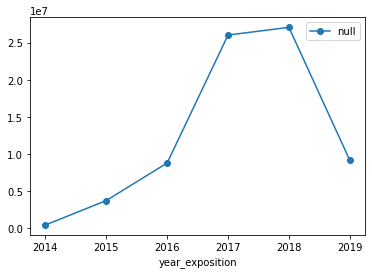

In [24]:
# создадим столбец с годом выставления квартиры
# рассмотрим, являются ли пропуски в столбце days_exposition случайными
data['year_exposition'] = data['first_day_exposition'].dt.year

data['null'] = data['days_exposition'].isna().sum()
(
data.pivot_table(index = 'year_exposition', values = 'null', aggfunc = 'sum')
    .plot(style='o-')
)
;

In [25]:
# код ревьюера 
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,958,1796


<div class="alert alert-block alert-info">
Пропусков много в 2017 и 2018 годах - не похоже на случайность. В таком случае заменять данные столбца days_exposition на 0 - ошибочное решение. Закомментировала замену на 0. Оставляем пропуски этого столбца как есть. 
    <div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Если рассматривать распределение пропусков относительно года выставления на продажу, можно заметить, что большая часть пропущенных значений - в 2019 году. Больше половины объектов, выставленных на продажу в 2019 году не имеет рассчитанного "времени продажи квартиры". Также высокая доля пропусков, хотя и меньшая - в 2018 году. Получается, чем свежей объявление - тем выше вероятность пропуска в этой колонке. 

Пропуск в этой колонке означает, что объект не продан и объявление не закрыто. Поэтому заполнять пропуски в этом столбце не надо - они не случайные и существенно влияют на статистику.

</div>


In [26]:
data['is_apartment'].unique()

# Nan заменим на False, так как объекты жилового фонда
data['is_apartment'] = data['is_apartment'].fillna(False)

In [27]:
# переведем столбец с ценой в формат int, для удобства расчета, так как это целое число
data['last_price'] = data['last_price'].astype('int')

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

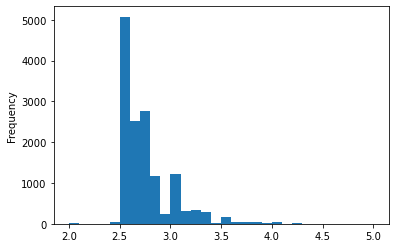

In [28]:
# посмотрим параметр ceiling_height, видим что есть необоснованно большие значения
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()

In [29]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [30]:
# проверим сколько объявлений с высотой потолков более 4 метра
# их 75
(data['ceiling_height']>4).value_counts()

False    23575
True        75
Name: ceiling_height, dtype: int64

In [31]:
# делим потолки выше 5 метров на 10, чтобы перевести из 27 метров, в 2.7, т.к. вероятно это ошибка
data['ceiling_height'] = data['ceiling_height'].where((data['ceiling_height']<5) | (data['ceiling_height']>100), 
                                                      data['ceiling_height']/10)

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, наверняка пользователь, вводивший данные, ошибся на порядок

</div>


In [32]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  0.52,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  0.53,
        0.5 ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  0.56,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  0.8 ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   
   По столбцу `living_area` - иногда продавцы могут не указывать данное значение, однако, мы можем попробовать его вычислить. Нужно найти **соотношение средней общей площади к средней жилой**. А затем, заполнить пропуски в столбце `living_area` **отношением общей площади к найденному соотношению**.

  Со столбцом `kitchen_area` можно поступить так же, как со столбцом `living_area`.
    <div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>



</div>

In [33]:
# найдем соотношение общей площади к жилой
# заменим пропуски в столбце living_area отношением общей площади к найденному соотношению
# проверим на наличие пропусков в столбце после замены
data['total_living_area_ratio'] = data['living_area'] / data['total_area']
data['average_ratio_living_area'] = data['total_living_area_ratio'].mean()
data['living_area'] = data['living_area'].fillna(data['average_ratio_living_area']*data['total_area'])
data['living_area'].isna().sum()

0

In [34]:
# найдем соотношение общей площади к площади кухни
# заменим пропуски в столбце kitchen_area отношением общей площади к найденному соотношению
# проверим на наличие пропусков в столбце после замены
data['total_kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data['average_ratio_kitchen_area'] = data['total_kitchen_area_ratio'].mean()
data.kitchen_area = data['kitchen_area'].fillna(data['average_ratio_kitchen_area']*data['total_area'])
data['kitchen_area'].isna().sum()


0

<div class="alert alert-block alert-info">
Заменила пропуски в столбцах living_area и kitchen_area значением - общая площадь * на среднее отношение искомой площади к общей.
   

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Также рекомендую поработать с выбросами, а затем посчитать долю обработанных данных:
    например, оставь те данные, где цена квартиры меньше 20 млн руб, высота потолков в диапазоне от 2.2 до 4х метров, а площадь меньше 200 метров. 

</div>



In [35]:
# запишем в таблицу отфильтрованные данные от вероятных выбросов
# с параметрами цена < 20 млн руб,высота потолков от 2.2 до 4х метров, площадь < 200 метров
# посчитаем долю обработанных данных
new_data = data[(data['last_price']<20000000) &
                (data['ceiling_height']>2.2) &
                (data['ceiling_height']<4) &
                (data['total_area']<200)]
new_data.shape[0]/data.shape[0]

0.5872727272727273

<div class="alert alert-block alert-info">
Если мы отбросим квартиры с ценой выше 20 млн., потолки меньше 2.2 и выше 4 метра, и общие площади свыше 200 метров, то удалится 41% данных. Допустимое удаление данных является не более 5%. 
В нашем случае фильтрация данных исказит дальнейший анализ. Оставим как есть.
    <div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
    Cогласен👍

</div>


**Выводы:**

Заменили пропуски на 0, без потери данных это было возможно в столбце с балконами, взяв за основу то, что незаполненные данные приравниваются к отсутствию балкона. Заменили пропуски в столбцах living_area и kitchen_area. Избавились от неявных дубликатов в столбце с населенными пунктами, используя замену. Поменяли логику столбцов в удобную последовательность. Преобразовали наименование столбца на змеиный регистр. Изменили тип данных для удобства расчета, где должны быть целые числа, а не числа с плавающей точкой. Также тип данных изменили в столбце с датой, чтобы мы могли разбить на столбцы день, месяц и год. Заменили аномальные значения в столбце с данными о высоте потолков, так как 27 метров - очевидно ошибка, и имелось ввиду 2.7 м.

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 
    
В целом, работа по предобработке проведена очень качественно. Можно еще сэкономить память, изменяя типы данных. Например, дополнительно изменить их у площадей квартир с float64 на float32.   
    
</div>    

### Посчитаем и добавим в таблицу новые столбцы

1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. тип этажа квартиры; варианты — первый, последний, другой;
4. расстояние в км до центра города.

In [36]:
# посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

# для удобства просмотра приведем к типу int
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [37]:
# Добавим столбцы c днем, месяцем и годом
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [38]:
# Проверяем
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,...,year_exposition,null,first_day_year,total_living_area_ratio,average_ratio_living_area,total_kitchen_area_ratio,average_ratio_kitchen_area,price_per_square_meter,day_of_week_exposition,month_exposition
0,санкт-петербург,108.0,51.00000,25.000000,2.70,3,0,8,16.0,False,...,2019,3180,2019,0.472222,0.56475,0.231481,0.187372,120370,3,3
1,поселок шушары,40.4,18.60000,11.000000,NaN,1,2,1,11.0,False,...,2018,3180,2018,0.460396,0.56475,0.272277,0.187372,82920,1,12
2,санкт-петербург,56.0,34.30000,8.300000,NaN,2,0,4,5.0,False,...,2015,3180,2015,0.612500,0.56475,0.148214,0.187372,92785,3,8
3,санкт-петербург,159.0,89.79525,29.792073,NaN,3,0,9,14.0,False,...,2015,3180,2015,NaN,0.56475,NaN,0.187372,408176,4,7
4,санкт-петербург,100.0,32.00000,41.000000,3.03,2,0,13,14.0,False,...,2018,3180,2018,0.320000,0.56475,0.410000,0.187372,100000,1,6


In [39]:
# Добавим тип этажей
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [40]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [41]:
# приведем значения столбцов с аэропортами и центрами города к километрам, и округлим до целых
data['city_center_distance_km'] = (data['city_centers_nearest'] / 1000).round()
data['nearest_airport_distance_km'] = (data['airports_nearest'] / 1000).round()

In [42]:
# удалим столбцы с метрами
del data['city_centers_nearest']
del data['airports_nearest']

In [43]:
# проверяем
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,...,total_living_area_ratio,average_ratio_living_area,total_kitchen_area_ratio,average_ratio_kitchen_area,price_per_square_meter,day_of_week_exposition,month_exposition,floor_category,city_center_distance_km,nearest_airport_distance_km
0,санкт-петербург,108.0,51.00000,25.000000,2.70,3,0,8,16.0,False,...,0.472222,0.56475,0.231481,0.187372,120370,3,3,другой,16.0,19.0
1,поселок шушары,40.4,18.60000,11.000000,NaN,1,2,1,11.0,False,...,0.460396,0.56475,0.272277,0.187372,82920,1,12,первый,19.0,13.0
2,санкт-петербург,56.0,34.30000,8.300000,NaN,2,0,4,5.0,False,...,0.612500,0.56475,0.148214,0.187372,92785,3,8,другой,14.0,22.0
3,санкт-петербург,159.0,89.79525,29.792073,NaN,3,0,9,14.0,False,...,NaN,0.56475,NaN,0.187372,408176,4,7,другой,7.0,28.0
4,санкт-петербург,100.0,32.00000,41.000000,3.03,2,0,13,14.0,False,...,0.320000,0.56475,0.410000,0.187372,100000,1,6,другой,8.0,32.0


In [44]:
data.columns.tolist()

['locality_name',
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'is_apartment',
 'studio',
 'open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'year_exposition',
 'null',
 'first_day_year',
 'total_living_area_ratio',
 'average_ratio_living_area',
 'total_kitchen_area_ratio',
 'average_ratio_kitchen_area',
 'price_per_square_meter',
 'day_of_week_exposition',
 'month_exposition',
 'floor_category',
 'city_center_distance_km',
 'nearest_airport_distance_km']

In [45]:
# для удобства меняем порядок столбцов 
data = data[[
 'locality_name',
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'floor_category',
 'is_apartment',
 'studio',
 'open_plan',
 'total_images',
 'price_per_square_meter',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest', 
 'total_living_area_ratio',
 'average_ratio_living_area',
 'total_kitchen_area_ratio',
 'average_ratio_kitchen_area',
 'null'
]]

In [46]:
# проверяем
data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,floor_category,...,nearest_airport_distance_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_living_area_ratio,average_ratio_living_area,total_kitchen_area_ratio,average_ratio_kitchen_area,null
0,санкт-петербург,108.0,51.00000,25.000000,2.70,3,0,8,16.0,другой,...,19.0,1.0,482.0,2.0,755.0,0.472222,0.56475,0.231481,0.187372,3180
1,поселок шушары,40.4,18.60000,11.000000,NaN,1,2,1,11.0,первый,...,13.0,0.0,NaN,0.0,NaN,0.460396,0.56475,0.272277,0.187372,3180
2,санкт-петербург,56.0,34.30000,8.300000,NaN,2,0,4,5.0,другой,...,22.0,1.0,90.0,2.0,574.0,0.612500,0.56475,0.148214,0.187372,3180
3,санкт-петербург,159.0,89.79525,29.792073,NaN,3,0,9,14.0,другой,...,28.0,2.0,84.0,3.0,234.0,NaN,0.56475,NaN,0.187372,3180
4,санкт-петербург,100.0,32.00000,41.000000,3.03,2,0,13,14.0,другой,...,32.0,2.0,112.0,1.0,48.0,0.320000,0.56475,0.410000,0.187372,3180


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   В данном блоке все верно👍

</div>


### 3. Исследовательский анализ данных

**1. Изучим следующие параметры и построим гистограмму для каждого:**
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

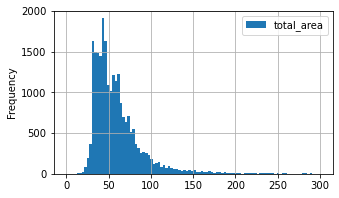

In [47]:
# изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,300))

# с помошью describe получим общее представление
data['total_area'].describe()

Распределение данных нормальное, есть выбросы, но они не сильно влияют на данные.
Большая часть квартир имеет общую площадь ~40-52 кв.метров.

count    23650.000000
mean        34.550654
std         22.331901
min          2.000000
25%         19.000000
50%         30.000000
75%         42.093469
max        409.700000
Name: living_area, dtype: float64

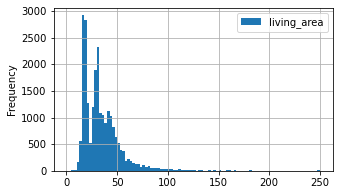

In [48]:
# изучим жилую площадь

data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,250))
data['living_area'].describe()

На гистограмме жилой площади имеется 2 пика, вероятно, это площадь однокомнатных и двухкомнатных квартир.
По ним можем сказать, что жилая площадь 1-ых квартир составляет ~22 кв.м., 2-ых квартир ~30-50 кв.м.
Распределение данных нормальное, также имеются выбросы, но на данные сильно не влияют.

count    23650.000000
mean        10.569202
std          6.092953
min          1.300000
25%          7.000000
50%          9.050045
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

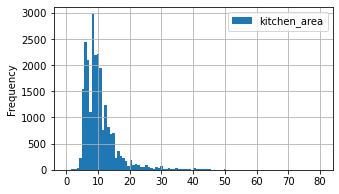

In [49]:
# изучим площадь кухни

data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,80))
data['kitchen_area'].describe()

Средняя площадь кухни составляет 10,6 кв.м.
Судя по гистограмме самый большой пик приходится на площадь ~8 кв.м. Как минимум 1 объявление имеет площадь кухни 112 кв.м. - похоже на выброс.
Основная масса объявлений имеет площадь кухни от 7-12 кв.м.

,last_price
count,"23,650.00"
mean,"6,541,126.90"
median,"4,650,000.00"
min,"12,190.00"
max,"763,000,000.00"


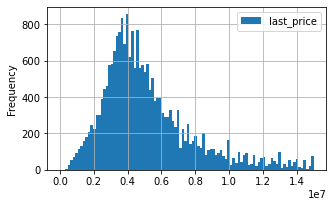

In [50]:
# изучим цену объектов
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data[['last_price']].apply(['count', 'mean','median', 'min', 'max']).style.format("{:,.2f}")

В среднем квартиры стоят 6.5 млн., медианное значение 4.6 млн. Очевидно есть выбросы: 763 млрд. - слишком много, так же как и 12 тыс. слишком мало.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

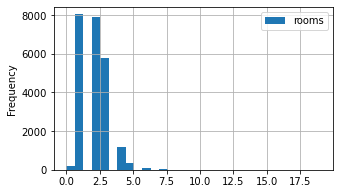

In [51]:
# количество комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

Основное количество объявлений приходится на 1 - 2-х комнатные квартиры. Реже, но достаточно много - 3-ех комнатные. Имеется максимальное количество комнат 19 - похоже на выброс. 



count    14490.000000
mean         2.723126
std          0.285208
min          0.500000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

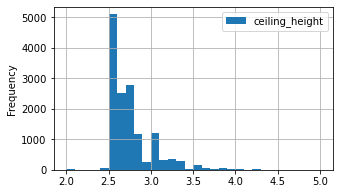

In [52]:
# высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range=(2,5))
data['ceiling_height'].describe()

Высота потолков в пределах нормы 2.6 м., но имеется выброс, как минимум 1 объявление указано с потолками в 10 м.


count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

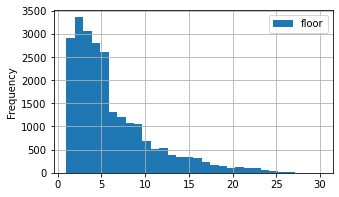

In [53]:
# этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range=(1,30))
data['floor'].describe()

В объявлениях чаще встречаются квартиры со 2-6 этаж.



In [54]:
# тип этажа квартиры («первый», «последний», «другой»)
data['floor_category'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_category, dtype: int64

Всего данных с указанными этажами 23 650

Квартир на 1ом этаже 12% из общей массы объявлений;
на последнем этаже 14%;
На других этажах 74%.
При покупке квартир многие отбрасывают первые и последние этажи, 74% квартир на других этажах - неплохой объем.

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

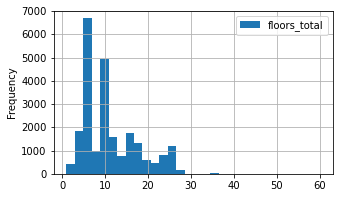

In [55]:
# общее количество этажей в доме
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range=(1,60))
data['floors_total'].describe()

Распространенные объявления в 5-ти и 9-ти этажных домах. 



count    18139.000000
mean        14.191576
std          8.614645
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_center_distance_km, dtype: float64

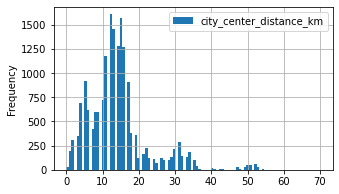

In [56]:
# расстояние до центра города в километрах
data.plot(y = 'city_center_distance_km', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range=(0,70))
data['city_center_distance_km'].describe()

В среднем расстояние до центра города от 13-16 км. Не мало количество квартир на расстоянии 5 км. Самое меньшее количество объявлений от 17 км. от центра города и дальше.

count    18116.000000
mean        28.809229
std         12.639962
min          0.000000
25%         19.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: nearest_airport_distance_km, dtype: float64

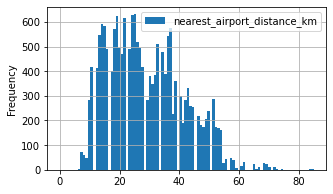

In [57]:
# расстояние до ближайшего аэропорта
data.plot(y = 'nearest_airport_distance_km', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range=(0,85))
data['nearest_airport_distance_km'].describe()

На гистограмме отображено несколько пиков, основная масса объявлений находится на расстоянии от 15-28 км, средняя удаленность от аэропорта 28 км. Далее есть большой скачок объявлений на расстоянии 35 км. 

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

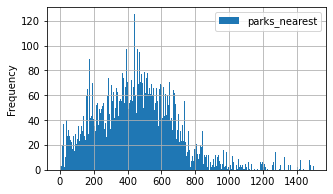

In [58]:
# расстояние до ближайшего парка в метрах
data.plot(y = 'parks_nearest', kind = 'hist', bins = 300, grid=True, figsize = (5,3), range=(0,1500))
data['parks_nearest'].describe()

Большинство парков находятся на расстоянии 450 метрах от квартир в объявлении. Много парков в диапазоне от 200-600 метров.

''

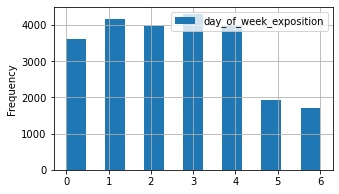

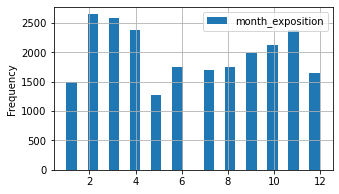

In [59]:
# день и месяц публикации объявления
data.plot(y = 'day_of_week_exposition', kind = 'hist', bins = 13, grid=True, figsize = (5,3), range=(0,6))
data.plot(y = 'month_exposition', kind = 'hist', bins = 24, grid=True, figsize = (5,3), range=(1,12))
;

Гистограмма по дням показывает, что объявления публикуют в будние дни больше, чем в выходные. 
Гистограмма по месяцам показывает, что чаще публикуют с февраля по апрель включительно, далее идет спад, рост публикаций возобновляется и растет с сентября по ноябрь включительно.

**Вывод:**

- Общая площадь в нашей выборке колеблется в среднем от 40 до 70 м2, среднее значение 60, а медиана 52 м2;
- жилая площадь в среднем от 18 до 42 м2;
- площадь кухни от 7 до 12 м2;
- цены на объекты по среднему значению 6.5, медиана 4.6 млн.;
- количество комнат - лидирующее количество объявлений 1-2ух комнатные;
- высота потолков от 2.5 до 2.8м;
- больше всего объявлений квартир со 2 по 6 этаж;
- общее количество этажей в доме - больше всего 5-ти этажных;
- среднеее расстояние до центра города от 13-16км.;
- среднее расстояние до ближайшего аэропорта - 27км.;
- среднее расстояние до ближайшего парка - 450м.;
- публикуют объявления чаще всего в будни, с февраля по апрель включительно, и с сентября по декабрь.

Во всех данных есть аномальные значения, наподобие 0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры в 12 190 рублей и 763 млрд. О данных аномальных значениях мы спросим у сотрудников, предоставивших нам выборку данных. Для общего изучения данных, мы не станем убирать эти выбивающиеся значения.

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 

Хороший результат. Хочу добавить, что обычно размеры двухкомнатных квартир составляют от 50 до 100 квадратных метров, что и соответствует проведенному анализу.
    
Могу посоветовать на будущее хорошую статью по оформлению графиков:
    https://devpractice.ru/matplotlib-lesson-3-3-text-elements/    
        
    
    
</div>

**2. Изучим, как быстро продавались квартиры. 
Построим гистограмму.
Посчитаем среднее и медиану.
Опишем, сколько обычно занимает продажа.**

In [60]:
data.columns.tolist()

['locality_name',
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'floor_category',
 'is_apartment',
 'studio',
 'open_plan',
 'total_images',
 'price_per_square_meter',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'total_living_area_ratio',
 'average_ratio_living_area',
 'total_kitchen_area_ratio',
 'average_ratio_kitchen_area',
 'null']

''

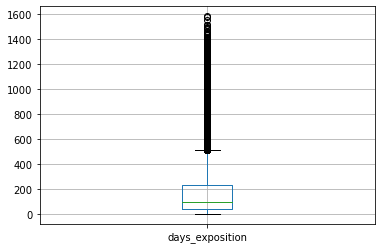

In [61]:
data.boxplot(column='days_exposition')
;

''

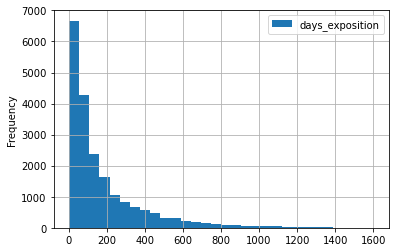

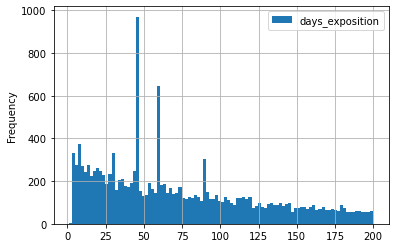

In [62]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

# в месте вершины построим более детальную гистограмму
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
;

In [63]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
# уточним в каких днях больше всего снимаются объявления
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
1553.0      1
793.0       1
1434.0      1
1231.0      1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод:**

Судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200, обнаружили выбивающиеся значения и методом value_counts убедились в этом - 45, 60, 7, 30, 90 - это наиболее популярное количество дней до снятия объявления.

Аномально быстрых размещений объявлений нет, долгие 1580 дней, что вероятнее всего является выбросом. 

По диаграмме размаха можно сказать, что нормальное время продажи - 500 дней.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Лучше удалить выбросы в районе 7, 30 , 45, 60, 90. Как думаешь, с чем они могут быть связаны?

</div>


In [65]:
# отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = data.query('days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')
                       

''

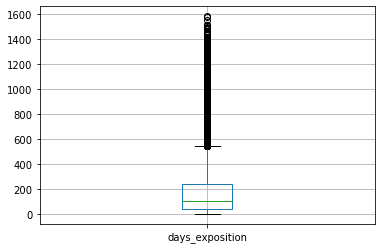

In [66]:
# диаграмма размаха
good_data.boxplot(column='days_exposition')
;

In [67]:
# удалим дни со значением 45 и 90, т.к. через фильтрацию эти данные все равно просачиваются
good_data = good_data.drop(index=good_data.query('days_exposition == 45').index)
good_data = good_data.drop(index=good_data.query('days_exposition == 90').index)

''

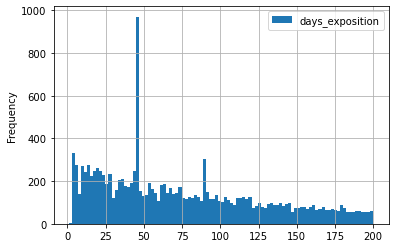

In [68]:
# построим гистограмму по отфильтрованным значениям
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
;

In [69]:
good_data[good_data['days_exposition']!=0]['days_exposition'].value_counts()

45.0      879
90.0      203
4.0       174
3.0       158
5.0       152
         ... 
1089.0      1
1179.0      1
1091.0      1
822.0       1
971.0       1
Name: days_exposition, Length: 1138, dtype: int64

<div class="alert alert-block alert-info">
Аномалии в виде скачков закрытия публикаций в дни 7, 30, 45, 60, 90 дней могут быть обусловлены тем, что существует автоматическое снятие публикации по прошествии определенного времени, 15 - 30 дней. 
Для того, чтобы в данных не учитывались эти выбросы, отфильтровали таблицу и присвоили переменной good_data. Фильтрацией убрались аномалии, кроме 45 и 90 дней. Попробовали удалить эти значения в строках, однако именно эти 2 значения остались. Вероятно есть ошибка данных записей. 
    <div class="alert alert-success">

**✔️ Комментарий ревьюера v2 ✔️**
   
   Верно. Фильтрация для float через != и == - не самый лучший вариант. Сталкивался уже с таким. Тут поможет >45&<46.
    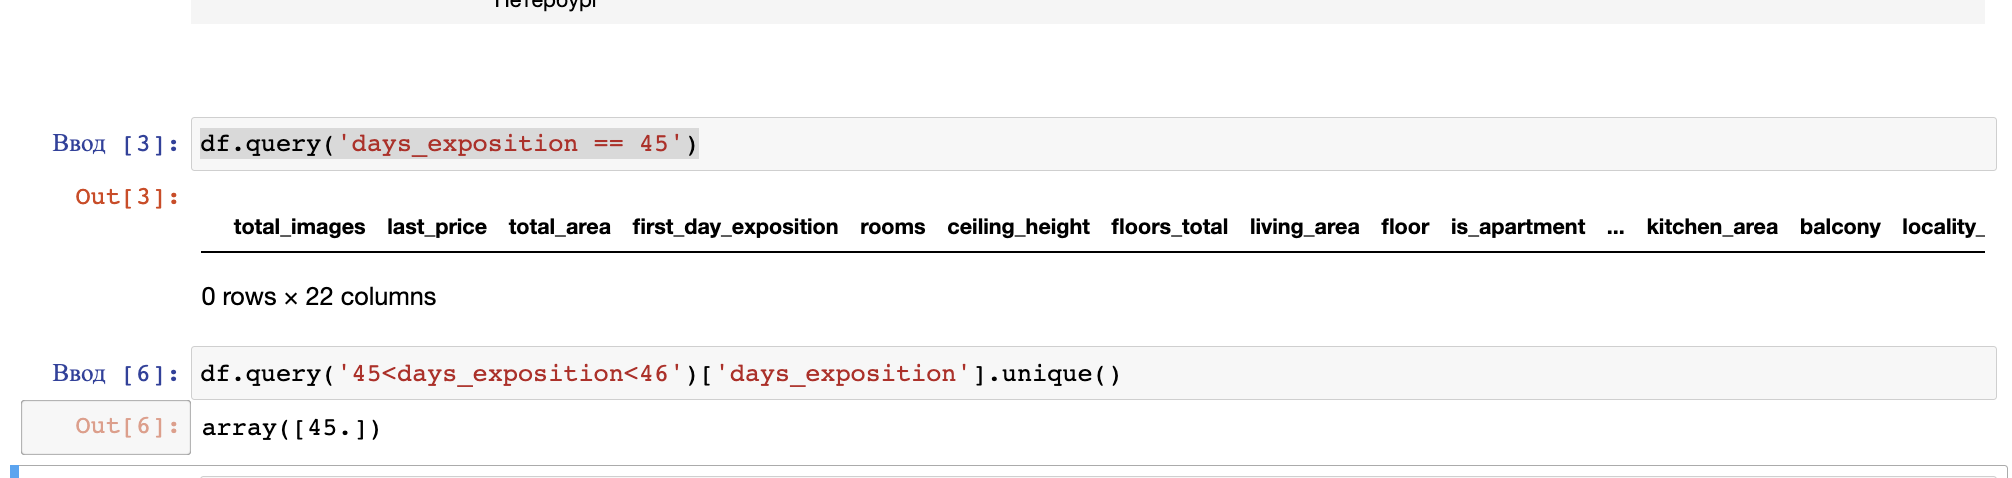                                                                                                                  
                                                                                                                      

</div>


**3. Построим графики, которые покажут зависимость цены от параметров.**

Изучим корреляцию зависимости полной стоимости объекта

In [70]:
corr = data[['last_price',\
           'total_area',\
           'living_area',\
           'kitchen_area',\
           'rooms',\
           'floor_category',\
           'day_of_week_exposition',\
           'month_exposition',\
           'year_exposition']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms,day_of_week_exposition,month_exposition,year_exposition
last_price,1.000000,0.653743,0.585700,0.516964,0.363421,0.001607,0.002741,-0.042927
total_area,0.653743,1.000000,0.945843,0.662190,0.758745,-0.004648,0.004924,-0.079496
living_area,0.585700,0.945843,1.000000,0.505017,0.827979,-0.004193,-0.000313,-0.071972
kitchen_area,0.516964,0.662190,0.505017,1.000000,0.327797,-0.003416,0.002967,-0.059467
rooms,0.363421,0.758745,0.827979,0.327797,1.000000,-0.004316,-0.004388,-0.054641
day_of_week_exposition,0.001607,-0.004648,-0.004193,-0.003416,-0.004316,1.000000,0.011354,-0.003844
month_exposition,0.002741,0.004924,-0.000313,0.002967,-0.004388,0.011354,1.000000,-0.271176
year_exposition,-0.042927,-0.079496,-0.071972,-0.059467,-0.054641,-0.003844,-0.271176,1.000000


**Вывод:**
На общую (полную) стоимость объекта влияет общая и жилая площадь, площадь кухни и количество комнат.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо, попробуй для наглядности использовать градиент для фона. Так корреляция будет еще более заметна.
Полезная ссылка: https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html.

</div>


Построим графики для рассмотрения зависимости общей цены от параметров.

''

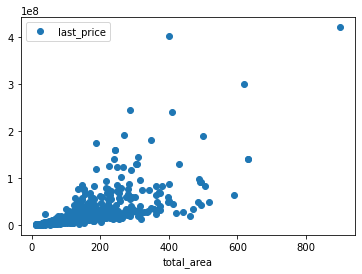

In [71]:
# зависимость полной стоимости объекта от общей площади
(
data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
    .plot(style='o')
)
;

Чем выше общая площадь, тем выше стоимость объекта.

''

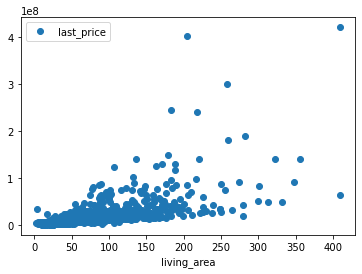

In [72]:
# зависимость общей цены от жилой площади
(
data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')
    .plot(style='o')
)
;

Чем выше жилая площадь, тем выше стоимость объекта, однако рост цены более плавный, чем при общей площади.

''

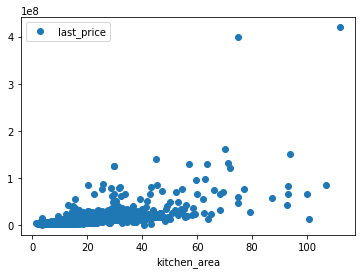

In [73]:
# зависимость общей цены от площади кухни
(
data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')
    .plot(style='o')
)
;

Зависимость роста общей стоимости так же наблюдается при увеличении площади кухни.

''

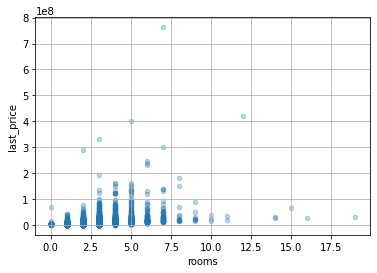

In [74]:
# зависимость общей цены от количества комнат
data.plot(kind='scatter',x='rooms', y='last_price', alpha=0.3, grid=True)
;

Чем больше комнат, тем выше цена.

''

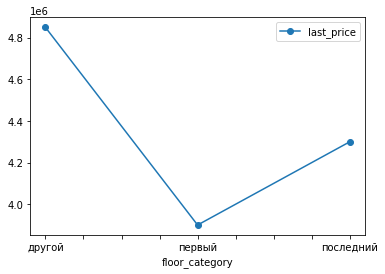

In [75]:
# зависимость от этажа (первый, последний, другой)
(
data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
    .plot(style='o-')
)
;

По графику видно, что самая низкая цена у квартир, находящиеся на первом этаже, далее последний этаж и самая высокая стоимость на остальных этажах.

''

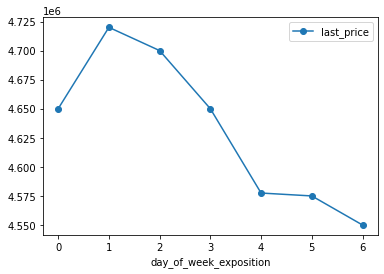

In [76]:
# зависимость от дня размещения объявления
(
data.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = 'median')
    .plot(style='o-')
)
;

Судя по графику, квартиры с более высоким ценником публикуют по вторникам и средам, а более низкой ценой по выходным. 

''

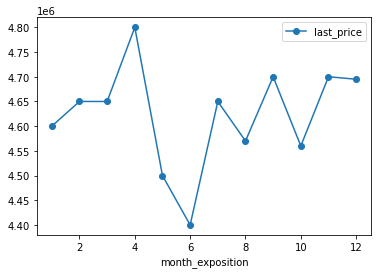

In [77]:
# зависимость от месяца размещения объявления
(
data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median')
    .plot(style='o-')
)
;

Объекты недвижимости с более высокой ценой публикуют в апреле, далее цена значительно снижается к июню, и начинает расти к осенним месяцам. Вероятно, более дорогие квартиры публикуют, в отсутствие сезонов отпусков.

''

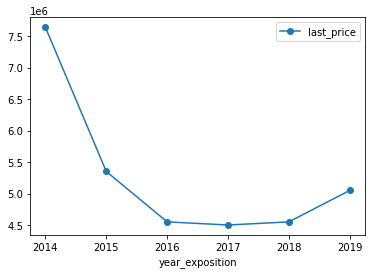

In [78]:
# зависимость от года размещения объявления
(
data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median')
    .plot(style='o-')
)
;

По графику можно сделать вывод, что квартиры с 2014 года резко "упали" в стоимости, практически не менялись в течении 3ех лет с 2016 года, и начали дорожать к 2019 году.

**Вывод.**
- На итоговую стоимость больше всего влияют - общая/жилая площадь объекта, и количество комнат;
- более низкая цена на квартиры находящиеся на первых этажах;
- в будние дни публикуют объекты с более высокой стоимостью;
- более высокая цена в объявлениях опубликованных в апреле, к лету стоимость значительно снижается, прослеживается сезонность продаж;
- с 2014 года по 2016 произошел резкий спад в стоимости недвижимости, к 2019 году виден постепенный рост.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошие результаты. Отмечу, что скорее всего, низкую цену на квартиры на первом и последнем этажах можно аргументировать плохими условиями - шум от улиц и моторов лифта, охлаждаемость помещения зимой. 

</div>

**4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [79]:
data.columns.tolist()

['locality_name',
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'floor_category',
 'is_apartment',
 'studio',
 'open_plan',
 'total_images',
 'price_per_square_meter',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'total_living_area_ratio',
 'average_ratio_living_area',
 'total_kitchen_area_ratio',
 'average_ratio_kitchen_area',
 'null']

In [80]:
# найдем 10 населенных пунктов с наибольшим числом объявлений и посчитаем среднюю стоимость 1 м2
top_10_locality_name = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
top_10_locality_name.columns = ['count', 'mean']
top_10_locality_name = top_10_locality_name.sort_values('count', ascending = False).head(10)
top_10_locality_name

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231
поселок мурино,556,85681.305755
поселок шушары,440,78676.904545
всеволожск,398,68654.007538
пушкин,369,103125.373984
колпино,338,75424.150888
поселок парголово,327,90175.489297
гатчина,307,68745.693811
деревня кудрово,299,92473.086957


In [81]:
# самая высокая стоимость
top_10_locality_name[top_10_locality_name['mean']==top_10_locality_name['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231


In [82]:
# самая низкая стоимость
top_10_locality_name[top_10_locality_name['mean']==top_10_locality_name['mean'].min()]

,count,mean
locality_name,,
выборг,237,58141.489451


**Вывод:**

Среди 10 наиболее часто публикуемых населенных пунктов: 
- высокая средняя стоимость 1м2 - Санкт-Петербург, 114 849 руб.;
- низкая средняя стоимость 1м2 - Выборг, 58 141 руб.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Наглядно👍

</div>


**5. Опишите, как стоимость объектов зависит от расстояния до центра города.**

''

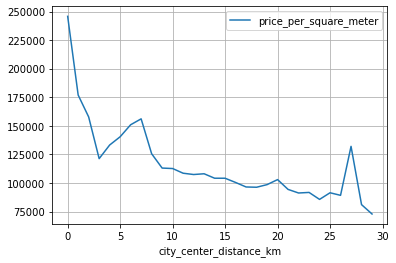

In [83]:
(
data.query('locality_name == "санкт-петербург"')
    .pivot_table(index = 'city_center_distance_km', values = 'price_per_square_meter')
    .plot(grid=True)
)
;

Стоимость за квадратный метр постепенно снижается с 10 км от центра города, самый дорогой м2 - центральный район Санкт-Петербурга. Чем дальше от центра города, тем дешевле стоимость. Примерно на 27 км от города имеется скачок стоимости, гипотетически это могут быть элитные районы. 

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Верно. На графике в районе 5 км заметно, что цена меняется. Это возможный центр города.
    
Если интересно, то самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.
Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2 

</div>

### Общий вывод

Используя данные сервиса Яндекс Недвижимость мы исследовали архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Выявили интересные особенности и взаимосвязи. 

**Рабочие гипотезы:**
- Стоимость недвижимости в центре города дороже, чем в его окрестностях;
- на стоимость объекта влияет площадь и местоположение;
- объявления публикуют независимо от дня/месяца/года; 
- квартиры продают за 2 недели/месяц. 

**Общие результаты:**

Больше всего объявлений о продаже опубликовано в Санкт-Петербурге, чем в его окрестностях. Стоимость 1 м2 дороже в Санкт-Петербурге. Однако, недалеко от города имеется, вероятно, элитная недвижимость, так как стоимость в пригороде резко возрастает, и далее снижается в соответствии с удаленностью от города. 
На стоимость объекта в основном влияет общая/жилая площадь - чем больше площадь, тем больше цена. Основная масса объявлений имеет общую площадь от 40 - 69м2. Также, чем ближе к центру города, тем цена возрастает. 
В результате исследования выявили, что у публикаций о продаже недвижимости имеется сезонность - чаще всего публикуют весной и осенью, вероятно, в сезон летних отпусков и длительных зимних праздников покупка квартир не стоит на первом месте. Интересная особенность, что во вторник публикуют квартиры с более высокой стоимостью, чем в другие дни недели. Если предположить, что при продаже недвижимости есть похожая система с продажей авиабилетов, то она может быть так же завязана на обновлении курса валют, которая происходит в ночь со вторника на среду. 
Быстрые продажи, подкрепленные также количеством объектов, прослеживаются в течение 7-ми дней. Также популярное количество дней с момента публикации объявления до его снятия составляют 30, 45, 60 дней. Нормальный диапазон срока продаж составляет до 95-200 дней. 

**В результате:** 
- первая гипотеза подтверждена; 
- вторая гипотеза подтверждена;
- третья гипотеза не подтверждена;
- четвертая гипотеза подтверждена частично.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Айгуль, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Айгуль, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>